In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

(1, 201)
(1, 101)
(101, 201)


<Figure size 432x288 with 0 Axes>

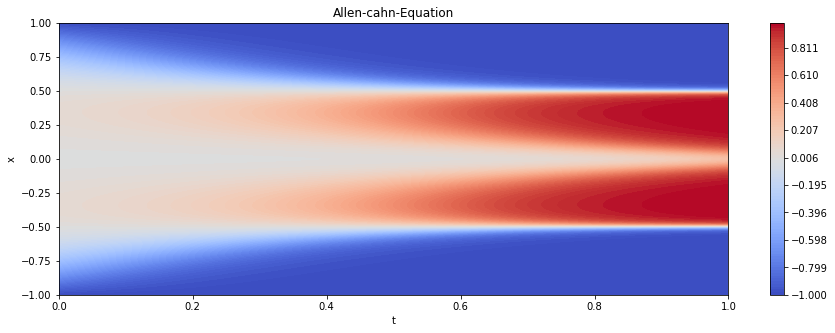

In [2]:
# Load the .mat file
mat_data = scipy.io.loadmat('Allen_Cahn.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Allen-cahn-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.gru(x, hidden)
        output = self.fc(output)
        return output, hidden


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('X.mat')

X = mat_data['X']

mat_data1 = scipy.io.loadmat('y_pred.mat')

u1 = mat_data1['y_pred']

np.set_printoptions(threshold=np.inf)


In [5]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [6]:
u1 = u1.reshape(101, 201)
u1_new = u1.T

<Figure size 432x288 with 0 Axes>

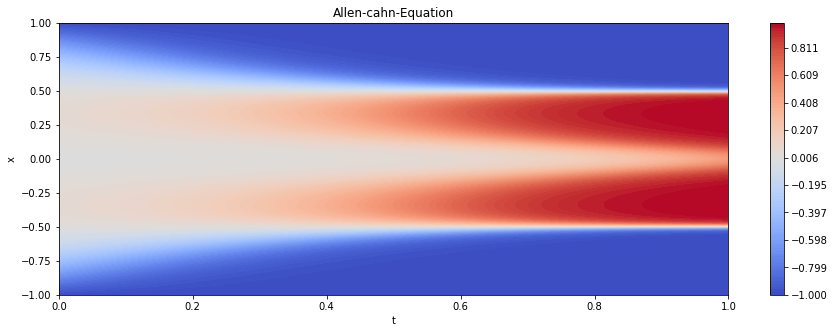

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split


X, T = np.meshgrid(x, t)

# # Define custom color levels
c_levels = np.linspace(np.min(u1_new),  np.max(u1_new), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u1_new.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Allen-cahn-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [8]:
# Toy problem data
input_size = 201  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 201
sequence_length = 80  # number of sequences/ number of rows
batch_size = 1
num_epochs = 20000

In [9]:
# data = scipy.io.loadmat('y_pred.mat')
u1 = u1_new


In [10]:
input_data = u1[:, 0:80]
target_data = u1[:, 1:81]

test_data = u1[:, 80] ### Change here
#test_target = u1[:, 81:101]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (201,)
input data shape (201, 80)
Target data shape (201, 80)


In [11]:
# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 80, 201])
Target tensor shape torch.Size([1, 80, 201])


In [12]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()


In [13]:
# Create GRU instance
gru = GRU(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = gru(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')





Epoch: 10/20000, Loss: 0.05016448
Epoch: 20/20000, Loss: 0.01982646
Epoch: 30/20000, Loss: 0.00723215
Epoch: 40/20000, Loss: 0.00368744
Epoch: 50/20000, Loss: 0.00264367
Epoch: 60/20000, Loss: 0.00213303
Epoch: 70/20000, Loss: 0.00181000
Epoch: 80/20000, Loss: 0.00160905
Epoch: 90/20000, Loss: 0.00143314
Epoch: 100/20000, Loss: 0.00126970
Epoch: 110/20000, Loss: 0.00111136
Epoch: 120/20000, Loss: 0.00096001
Epoch: 130/20000, Loss: 0.00082346
Epoch: 140/20000, Loss: 0.00118757
Epoch: 150/20000, Loss: 0.00064623
Epoch: 160/20000, Loss: 0.00054546
Epoch: 170/20000, Loss: 0.00046255
Epoch: 180/20000, Loss: 0.00039713
Epoch: 190/20000, Loss: 0.00035525
Epoch: 200/20000, Loss: 0.00031833
Epoch: 210/20000, Loss: 0.00029091
Epoch: 220/20000, Loss: 0.00026849
Epoch: 230/20000, Loss: 0.00025083
Epoch: 240/20000, Loss: 0.00027622
Epoch: 250/20000, Loss: 0.00048668
Epoch: 260/20000, Loss: 0.00022955
Epoch: 270/20000, Loss: 0.00022358
Epoch: 280/20000, Loss: 0.00020658
Epoch: 290/20000, Loss: 0.000

Epoch: 2320/20000, Loss: 0.00001091
Epoch: 2330/20000, Loss: 0.00001073
Epoch: 2340/20000, Loss: 0.00001059
Epoch: 2350/20000, Loss: 0.00001045
Epoch: 2360/20000, Loss: 0.00001064
Epoch: 2370/20000, Loss: 0.00004115
Epoch: 2380/20000, Loss: 0.00002473
Epoch: 2390/20000, Loss: 0.00002633
Epoch: 2400/20000, Loss: 0.00003300
Epoch: 2410/20000, Loss: 0.00001524
Epoch: 2420/20000, Loss: 0.00001127
Epoch: 2430/20000, Loss: 0.00001043
Epoch: 2440/20000, Loss: 0.00001046
Epoch: 2450/20000, Loss: 0.00001262
Epoch: 2460/20000, Loss: 0.00014430
Epoch: 2470/20000, Loss: 0.00008881
Epoch: 2480/20000, Loss: 0.00001126
Epoch: 2490/20000, Loss: 0.00002056
Epoch: 2500/20000, Loss: 0.00001004
Epoch: 2510/20000, Loss: 0.00001044
Epoch: 2520/20000, Loss: 0.00000998
Epoch: 2530/20000, Loss: 0.00000948
Epoch: 2540/20000, Loss: 0.00000950
Epoch: 2550/20000, Loss: 0.00000925
Epoch: 2560/20000, Loss: 0.00000941
Epoch: 2570/20000, Loss: 0.00003470
Epoch: 2580/20000, Loss: 0.00012415
Epoch: 2590/20000, Loss: 0.0

Epoch: 4600/20000, Loss: 0.00000220
Epoch: 4610/20000, Loss: 0.00000216
Epoch: 4620/20000, Loss: 0.00000213
Epoch: 4630/20000, Loss: 0.00000215
Epoch: 4640/20000, Loss: 0.00000581
Epoch: 4650/20000, Loss: 0.00025325
Epoch: 4660/20000, Loss: 0.00001927
Epoch: 4670/20000, Loss: 0.00001774
Epoch: 4680/20000, Loss: 0.00000745
Epoch: 4690/20000, Loss: 0.00000523
Epoch: 4700/20000, Loss: 0.00000299
Epoch: 4710/20000, Loss: 0.00000237
Epoch: 4720/20000, Loss: 0.00000225
Epoch: 4730/20000, Loss: 0.00000211
Epoch: 4740/20000, Loss: 0.00000208
Epoch: 4750/20000, Loss: 0.00000201
Epoch: 4760/20000, Loss: 0.00000198
Epoch: 4770/20000, Loss: 0.00000206
Epoch: 4780/20000, Loss: 0.00001010
Epoch: 4790/20000, Loss: 0.00015458
Epoch: 4800/20000, Loss: 0.00001410
Epoch: 4810/20000, Loss: 0.00001418
Epoch: 4820/20000, Loss: 0.00000646
Epoch: 4830/20000, Loss: 0.00000334
Epoch: 4840/20000, Loss: 0.00000233
Epoch: 4850/20000, Loss: 0.00000218
Epoch: 4860/20000, Loss: 0.00000211
Epoch: 4870/20000, Loss: 0.0

Epoch: 6880/20000, Loss: 0.00000131
Epoch: 6890/20000, Loss: 0.00000122
Epoch: 6900/20000, Loss: 0.00000116
Epoch: 6910/20000, Loss: 0.00000112
Epoch: 6920/20000, Loss: 0.00000108
Epoch: 6930/20000, Loss: 0.00000105
Epoch: 6940/20000, Loss: 0.00000102
Epoch: 6950/20000, Loss: 0.00000100
Epoch: 6960/20000, Loss: 0.00000107
Epoch: 6970/20000, Loss: 0.00003059
Epoch: 6980/20000, Loss: 0.00004094
Epoch: 6990/20000, Loss: 0.00003562
Epoch: 7000/20000, Loss: 0.00000769
Epoch: 7010/20000, Loss: 0.00000668
Epoch: 7020/20000, Loss: 0.00000399
Epoch: 7030/20000, Loss: 0.00000210
Epoch: 7040/20000, Loss: 0.00000153
Epoch: 7050/20000, Loss: 0.00000138
Epoch: 7060/20000, Loss: 0.00000130
Epoch: 7070/20000, Loss: 0.00000120
Epoch: 7080/20000, Loss: 0.00000115
Epoch: 7090/20000, Loss: 0.00000111
Epoch: 7100/20000, Loss: 0.00000107
Epoch: 7110/20000, Loss: 0.00000104
Epoch: 7120/20000, Loss: 0.00000101
Epoch: 7130/20000, Loss: 0.00000098
Epoch: 7140/20000, Loss: 0.00000096
Epoch: 7150/20000, Loss: 0.0

Epoch: 9190/20000, Loss: 0.00001012
Epoch: 9200/20000, Loss: 0.00000952
Epoch: 9210/20000, Loss: 0.00000189
Epoch: 9220/20000, Loss: 0.00000180
Epoch: 9230/20000, Loss: 0.00000102
Epoch: 9240/20000, Loss: 0.00000077
Epoch: 9250/20000, Loss: 0.00000070
Epoch: 9260/20000, Loss: 0.00000067
Epoch: 9270/20000, Loss: 0.00000063
Epoch: 9280/20000, Loss: 0.00000062
Epoch: 9290/20000, Loss: 0.00000070
Epoch: 9300/20000, Loss: 0.00000513
Epoch: 9310/20000, Loss: 0.00009478
Epoch: 9320/20000, Loss: 0.00002575
Epoch: 9330/20000, Loss: 0.00000272
Epoch: 9340/20000, Loss: 0.00000185
Epoch: 9350/20000, Loss: 0.00000142
Epoch: 9360/20000, Loss: 0.00000092
Epoch: 9370/20000, Loss: 0.00000071
Epoch: 9380/20000, Loss: 0.00000074
Epoch: 9390/20000, Loss: 0.00000118
Epoch: 9400/20000, Loss: 0.00001900
Epoch: 9410/20000, Loss: 0.00004888
Epoch: 9420/20000, Loss: 0.00000677
Epoch: 9430/20000, Loss: 0.00000510
Epoch: 9440/20000, Loss: 0.00000169
Epoch: 9450/20000, Loss: 0.00000072
Epoch: 9460/20000, Loss: 0.0

Epoch: 11450/20000, Loss: 0.00000057
Epoch: 11460/20000, Loss: 0.00000055
Epoch: 11470/20000, Loss: 0.00000125
Epoch: 11480/20000, Loss: 0.00003190
Epoch: 11490/20000, Loss: 0.00001553
Epoch: 11500/20000, Loss: 0.00000754
Epoch: 11510/20000, Loss: 0.00000381
Epoch: 11520/20000, Loss: 0.00000214
Epoch: 11530/20000, Loss: 0.00000099
Epoch: 11540/20000, Loss: 0.00000061
Epoch: 11550/20000, Loss: 0.00000064
Epoch: 11560/20000, Loss: 0.00000048
Epoch: 11570/20000, Loss: 0.00000058
Epoch: 11580/20000, Loss: 0.00000326
Epoch: 11590/20000, Loss: 0.00006569
Epoch: 11600/20000, Loss: 0.00001280
Epoch: 11610/20000, Loss: 0.00000472
Epoch: 11620/20000, Loss: 0.00000155
Epoch: 11630/20000, Loss: 0.00000130
Epoch: 11640/20000, Loss: 0.00000065
Epoch: 11650/20000, Loss: 0.00000067
Epoch: 11660/20000, Loss: 0.00000198
Epoch: 11670/20000, Loss: 0.00004122
Epoch: 11680/20000, Loss: 0.00000419
Epoch: 11690/20000, Loss: 0.00000654
Epoch: 11700/20000, Loss: 0.00000388
Epoch: 11710/20000, Loss: 0.00000205
E

Epoch: 13690/20000, Loss: 0.00000421
Epoch: 13700/20000, Loss: 0.00005736
Epoch: 13710/20000, Loss: 0.00001397
Epoch: 13720/20000, Loss: 0.00000370
Epoch: 13730/20000, Loss: 0.00000114
Epoch: 13740/20000, Loss: 0.00000170
Epoch: 13750/20000, Loss: 0.00000056
Epoch: 13760/20000, Loss: 0.00000066
Epoch: 13770/20000, Loss: 0.00000075
Epoch: 13780/20000, Loss: 0.00000896
Epoch: 13790/20000, Loss: 0.00006340
Epoch: 13800/20000, Loss: 0.00001979
Epoch: 13810/20000, Loss: 0.00000722
Epoch: 13820/20000, Loss: 0.00000305
Epoch: 13830/20000, Loss: 0.00000129
Epoch: 13840/20000, Loss: 0.00000093
Epoch: 13850/20000, Loss: 0.00000051
Epoch: 13860/20000, Loss: 0.00000055
Epoch: 13870/20000, Loss: 0.00000066
Epoch: 13880/20000, Loss: 0.00000528
Epoch: 13890/20000, Loss: 0.00006330
Epoch: 13900/20000, Loss: 0.00001666
Epoch: 13910/20000, Loss: 0.00000246
Epoch: 13920/20000, Loss: 0.00000159
Epoch: 13930/20000, Loss: 0.00000094
Epoch: 13940/20000, Loss: 0.00000081
Epoch: 13950/20000, Loss: 0.00000050
E

Epoch: 15910/20000, Loss: 0.00000505
Epoch: 15920/20000, Loss: 0.00009899
Epoch: 15930/20000, Loss: 0.00001212
Epoch: 15940/20000, Loss: 0.00000930
Epoch: 15950/20000, Loss: 0.00000361
Epoch: 15960/20000, Loss: 0.00000536
Epoch: 15970/20000, Loss: 0.00000173
Epoch: 15980/20000, Loss: 0.00000158
Epoch: 15990/20000, Loss: 0.00000099
Epoch: 16000/20000, Loss: 0.00000267
Epoch: 16010/20000, Loss: 0.00000594
Epoch: 16020/20000, Loss: 0.00000045
Epoch: 16030/20000, Loss: 0.00000246
Epoch: 16040/20000, Loss: 0.00000524
Epoch: 16050/20000, Loss: 0.00000618
Epoch: 16060/20000, Loss: 0.00000914
Epoch: 16070/20000, Loss: 0.00001223
Epoch: 16080/20000, Loss: 0.00002341
Epoch: 16090/20000, Loss: 0.00000624
Epoch: 16100/20000, Loss: 0.00000129
Epoch: 16110/20000, Loss: 0.00000189
Epoch: 16120/20000, Loss: 0.00000118
Epoch: 16130/20000, Loss: 0.00000202
Epoch: 16140/20000, Loss: 0.00002027
Epoch: 16150/20000, Loss: 0.00002599
Epoch: 16160/20000, Loss: 0.00002334
Epoch: 16170/20000, Loss: 0.00001302
E

Epoch: 18160/20000, Loss: 0.00000028
Epoch: 18170/20000, Loss: 0.00000026
Epoch: 18180/20000, Loss: 0.00000026
Epoch: 18190/20000, Loss: 0.00000057
Epoch: 18200/20000, Loss: 0.00002730
Epoch: 18210/20000, Loss: 0.00003198
Epoch: 18220/20000, Loss: 0.00001240
Epoch: 18230/20000, Loss: 0.00000322
Epoch: 18240/20000, Loss: 0.00000165
Epoch: 18250/20000, Loss: 0.00000048
Epoch: 18260/20000, Loss: 0.00000054
Epoch: 18270/20000, Loss: 0.00000037
Epoch: 18280/20000, Loss: 0.00000085
Epoch: 18290/20000, Loss: 0.00002549
Epoch: 18300/20000, Loss: 0.00000893
Epoch: 18310/20000, Loss: 0.00002186
Epoch: 18320/20000, Loss: 0.00000616
Epoch: 18330/20000, Loss: 0.00000391
Epoch: 18340/20000, Loss: 0.00000159
Epoch: 18350/20000, Loss: 0.00000056
Epoch: 18360/20000, Loss: 0.00000036
Epoch: 18370/20000, Loss: 0.00000039
Epoch: 18380/20000, Loss: 0.00000036
Epoch: 18390/20000, Loss: 0.00000203
Epoch: 18400/20000, Loss: 0.00003263
Epoch: 18410/20000, Loss: 0.00002343
Epoch: 18420/20000, Loss: 0.00001120
E

In [14]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 201).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 201])
torch.Size([1, 20, 201])


In [15]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = gru(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 201).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = gru(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 201).float()
        prediction_tensor[:, i+1, :] = prediction

In [16]:
# exact
u_test = u
u_test_full = u_test[80:100, :]

In [17]:

k1 = (prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
u_test_full_tensor.shape

torch.Size([20, 201])

In [18]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.009314086302490355 %


In [19]:
R_abs = torch.max(prediction-u_test_full)
R_abs

tensor(0.1763, dtype=torch.float64)

In [20]:
R_mean = torch.mean(torch.abs(prediction - u_test_full))
R_mean

tensor(0.0508, dtype=torch.float64)

In [21]:
import torch

a = prediction
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())


Explained Variance Score: 0.9919727059841501


In [22]:
prediction_tensor = torch.squeeze(prediction_tensor)
prediction_tensor.shape

torch.Size([20, 201])

In [23]:
conc_u = torch.squeeze(input_tensor)
prediction_tensor = torch.squeeze(prediction_tensor)

In [24]:
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)

concatenated_tensor.shape

torch.Size([100, 201])

In [25]:
t1 = np.linspace(0, 1 , 100)

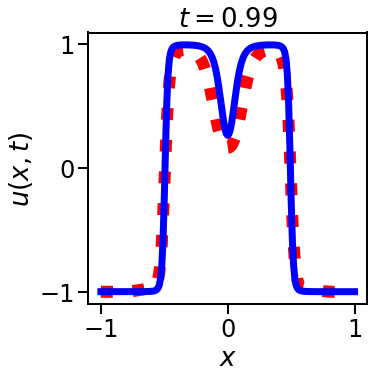

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)

final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u[-2, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.99}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('GRU_0.99_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


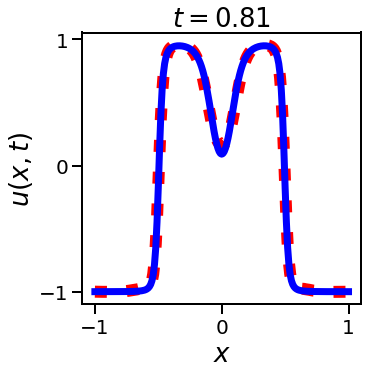

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-20, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u[-20, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.81}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('GRU_0.81_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


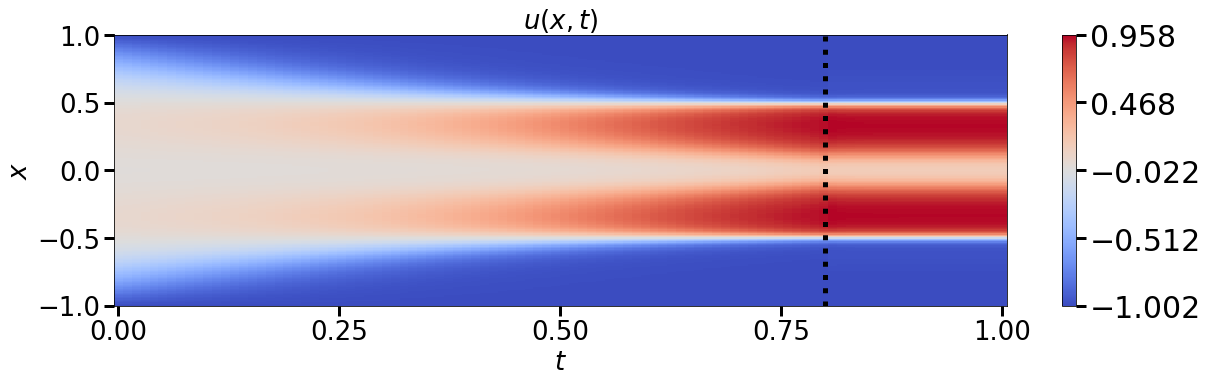

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-1, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='coolwarm')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_GRU_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
